# Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Importing necesssary python libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Exploring Data Set

### Reading input file

In [9]:
df=pd.read_csv(r'C:\Users\GirlEffect\Desktop\personal\upgrad\Lending Case Study\loan.csv')

### Checking headers in file

In [10]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'mths_since_last_record', 'pub_rec_bankruptcies'],
      dtype='object')

### Lets see what kind of values have each column

In [11]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_record,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,NaN,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,NaN,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,NaN,0.0


### checking number of columns and rows

In [12]:
df.shape

(39717, 23)

### checking the numeric columns

In [13]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_record,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,2786.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,69.698134,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,43.822529,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,22.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,90.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,104.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,129.000000,2.000000


### checking the null columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

Above we observer that mth_since_last_record has 2786 rows having not null or NA values. The values are less that 10% of rows total rows(39717). So this column we can drop as its value does not have much impact on other attributes.

In [15]:
#dropping the mths_since_last_record   column from dataframe
df=df.drop(['mths_since_last_record'], axis = 1)

In [16]:
#checking new shape
df.shape

(39717, 22)

In [17]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  desc               

Now analysing the each columns and check what type of values we have in each column

In [19]:
df['loan_amnt'].mean()

11219.443814991062

In [20]:
df['loan_amnt'].median()

10000.0

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([    0,     5,    10, ..., 34985, 34990, 34995]),
 <BarContainer object of 6999 artists>)

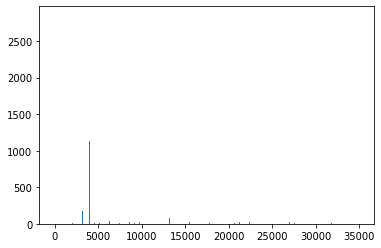

In [21]:
bins_l=range(0,max(df['loan_amnt']),5)
plt.hist(df['loan_amnt'],bins=bins_l)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d24ff61f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d24ff73610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d24ff61d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d24ff73af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d24ff73dc0>],
 'means': []}

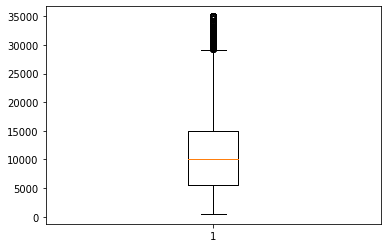

In [22]:
plt.boxplot(df['loan_amnt'])

In [23]:
min(df['loan_amnt'])

500

In [24]:
df=df[df['loan_status']!='Current']

In [25]:
df.shape

(38577, 22)

In [26]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [27]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,37880.000000
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.043479
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.204583
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,2.000000


Now starting the univariate analysis on numeric columns. Numeric columns are picked from df.describe() output

{'whiskers': [<matplotlib.lines.Line2D at 0x1d24ff55eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d24b6b8490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d24ff55be0>,
 'medians': [<matplotlib.lines.Line2D at 0x1d24b6b8a30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d24b6b8d00>,
 'means': []}

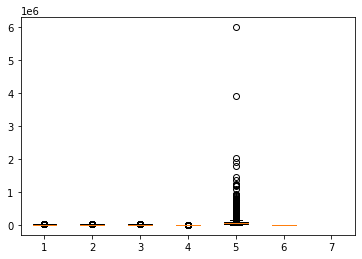

In [28]:
plt.boxplot(df[['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','pub_rec_bankruptcies']])

In above boxplots on each numeric columns, we are unable to distinguish and get precentiles. So dividing the columns for box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2499c5f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2499d3520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2499c5d90>,
 'medians': [<matplotlib.lines.Line2D at 0x1d2499d3ac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d2499d3d90>,
 'means': []}

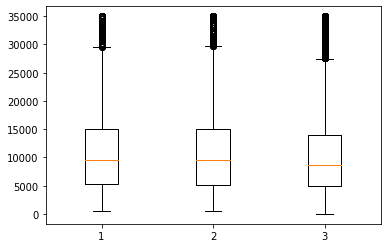

In [29]:
#fig4, ax4 = plt.subplots()
#ax4.boxplot(df[['loan_amnt','funded_amnt','funded_amnt_inv']])
plt.boxplot(df[['loan_amnt','funded_amnt','funded_amnt_inv']])#,'installment','annual_inc','dti','pub_rec_bankruptcies']])

There are outliers we can see in loan_amnt. Lets remove outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d249a577f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d249a57d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d249a4d370>],
 'medians': [<matplotlib.lines.Line2D at 0x1d249a67370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d249a67640>],
 'means': []}

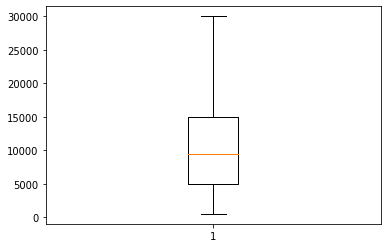

In [30]:
k=np.percentile(df['loan_amnt'],[98])
df=df[df['loan_amnt']<=k[0]]
plt.boxplot(df['loan_amnt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d249ab5df0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d249ac53d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d249ab5c40>,
 'medians': [<matplotlib.lines.Line2D at 0x1d249ac5970>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d249ac5c40>,
 'means': []}

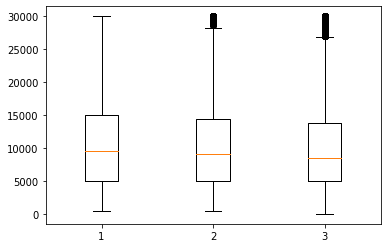

In [31]:
plt.boxplot(df[['loan_amnt','funded_amnt','funded_amnt_inv']])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d24b8ffb50>,
 'caps': [<matplotlib.lines.Line2D at 0x1d24b90f130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d24b8ff9a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1d24b90f6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d24b90f9a0>,
 'means': []}

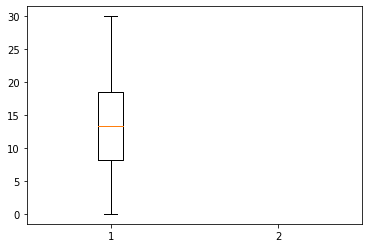

In [32]:
plt.boxplot(df[['dti','pub_rec_bankruptcies']])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d24b974be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d24b9841c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d24b974a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1d24b984760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d24b984a30>],
 'means': []}

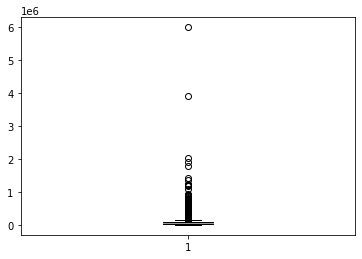

In [33]:
#sns.boxplot(x='annual_inc', data=df)
plt.boxplot(df['annual_inc'])

Here we can observe a lot of outliers in annual_inc column

In [34]:
df['annual_inc'].mean()

67635.0490935997

In [35]:
df['annual_inc'].median()

57814.42

In [36]:
max(df['annual_inc'])

6000000.0

In [37]:
min(df['annual_inc'])

4000.0

In [38]:
m=np.percentile(df['annual_inc'],[95])
m

array([140000.])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d24b762310>,
 'caps': [<matplotlib.lines.Line2D at 0x1d24b7628b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d24b762040>],
 'medians': [<matplotlib.lines.Line2D at 0x1d24b762e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d24b772160>],
 'means': []}

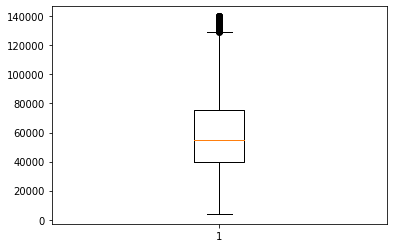

In [39]:
df=df[df['annual_inc']<m[0]]
plt.boxplot(df['annual_inc'])

In [40]:
df.shape

(35947, 22)

We  are unable to plot the box plot for pub_rec_banruptcies

In [41]:
df.groupby('pub_rec_bankruptcies').count()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti
pub_rec_bankruptcies,,,,,,,,,,,,,,,,,,,,,
0.0,33700,33700,33700,33700,33700,33700,33700,33700,31740,32802,...,33700,33700,33700,33700,22612,33700,33689,33700,33700,33700
1.0,1584,1584,1584,1584,1584,1584,1584,1584,1428,1480,...,1584,1584,1584,1584,1065,1584,1584,1584,1584,1584
2.0,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,2,5,5,5,5,5


pub_rec_bankruptcies is a categorical data that we can use further

Now moving on to the univariate analysis of text columns

In [42]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [43]:
df.groupby('term')['term'].count()

term
 36 months    27483
 60 months     8464
Name: term, dtype: int64

Here the term should be numeric , so converting it into number

In [44]:
df['term_int']=df['term'].apply(lambda x:int(x.split()[0]))

<AxesSubplot:xlabel='term_int'>

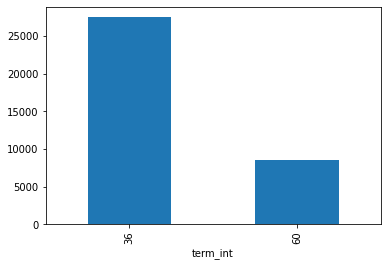

In [45]:
df.groupby('term_int')['term_int'].count().plot(kind='bar')

<AxesSubplot:xlabel='int_rate'>

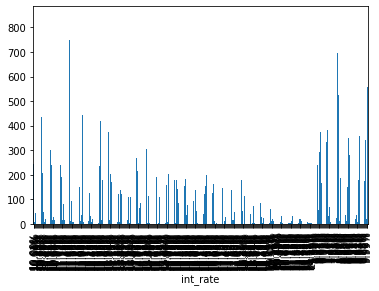

In [46]:
df.groupby('int_rate')['int_rate'].count().plot(kind='bar')

Interest rate should also be a float column. converting it

In [47]:
df['int_rate_flt']=df['int_rate'].apply(lambda x:float(x.replace('%','')))

<AxesSubplot:xlabel='int_rate_flt'>

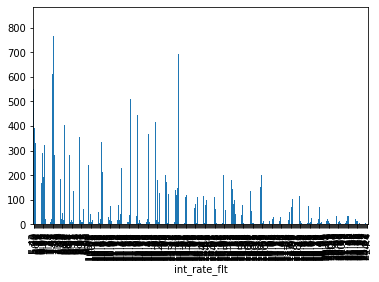

In [48]:
df.groupby('int_rate_flt')['int_rate_flt'].count().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

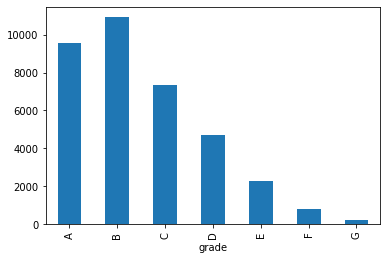

In [49]:
df.groupby('grade')['grade'].count().plot(kind='bar')

<AxesSubplot:xlabel='sub_grade'>

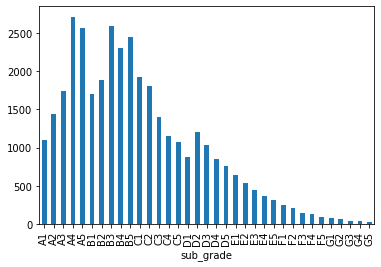

In [50]:
df.groupby('sub_grade')['sub_grade'].count().plot(kind='bar')

In [51]:
df.groupby('emp_title').count().sort_values('loan_amnt')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,desc,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,term_int,int_rate_flt
emp_title,,,,,,,,,,,,,,,,,,,,,
old palm inc,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Right at School,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
Right Angle Contracting,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
Rigby Oil Co.,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
Ridgewood Preparatory School,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UPS,50,50,50,50,50,50,50,50,50,50,...,50,36,50,50,50,50,50,50,50,50
US Air Force,51,51,51,51,51,51,51,51,51,51,...,51,37,51,51,51,51,51,50,51,51
AT&T,55,55,55,55,55,55,55,55,55,55,...,55,39,55,55,55,55,55,55,55,55


<AxesSubplot:xlabel='emp_length'>

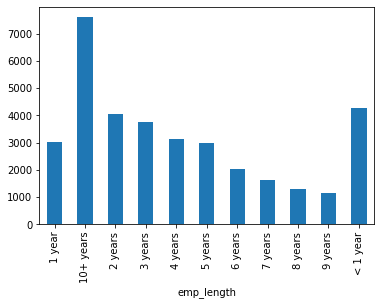

In [52]:
df.groupby('emp_length')['emp_length'].count().plot(kind='bar')

<AxesSubplot:xlabel='home_ownership'>

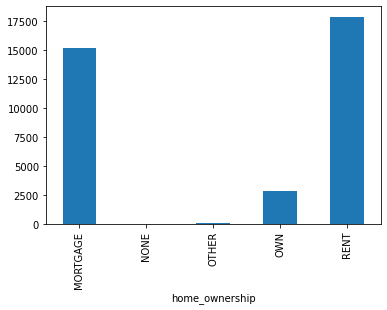

In [53]:
df.groupby('home_ownership')['home_ownership'].count().plot(kind='bar')

<AxesSubplot:xlabel='verification_status'>

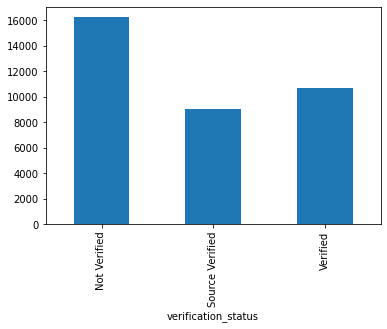

In [54]:
df.groupby('verification_status')['verification_status'].count().plot(kind='bar')

<AxesSubplot:xlabel='issue_d'>

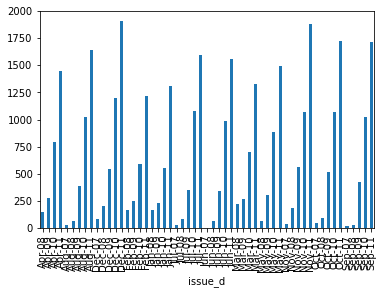

In [55]:
df.groupby('issue_d')['issue_d'].count().plot(kind='bar')

In [56]:
df['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39711    Jul-07
39712    Jul-07
39713    Jul-07
39714    Jul-07
39716    Jun-07
Name: issue_d, Length: 35947, dtype: object

In [57]:
df['issue_d']=pd.to_datetime(df['issue_d'],format='%b-%y')
df['issue_year']=df['issue_d'].dt.year
df['issue_month']=df['issue_d'].dt.month

<AxesSubplot:xlabel='issue_month'>

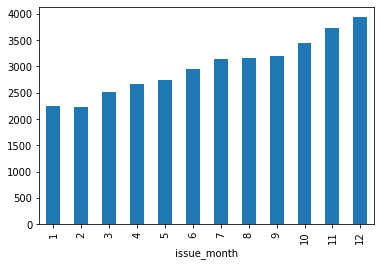

In [58]:
df.groupby('issue_month')['issue_month'].count().plot(kind='bar')

<AxesSubplot:xlabel='issue_year'>

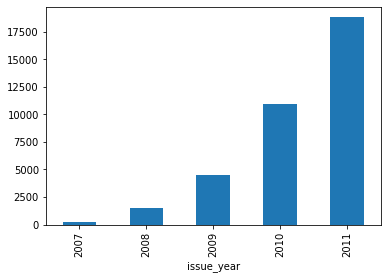

In [59]:
df.groupby('issue_year')['issue_year'].count().plot(kind='bar')

<AxesSubplot:xlabel='issue_d'>

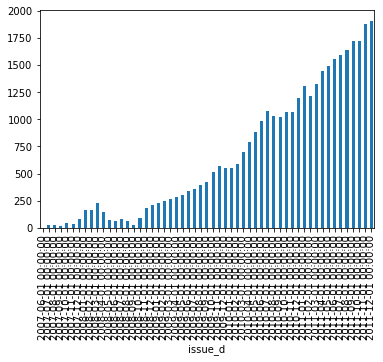

In [60]:
df.groupby('issue_d')['issue_d'].count().plot(kind='bar')

<AxesSubplot:xlabel='loan_status'>

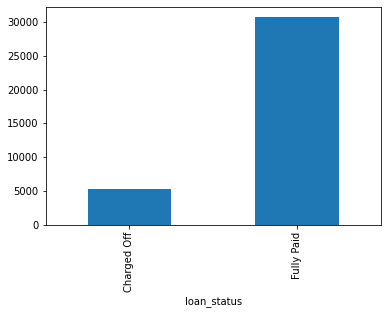

In [61]:
df.groupby('loan_status')['loan_status'].count().plot(kind='bar')

In [62]:
df.groupby('desc').count().sort_values('loan_amnt')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,term_int,int_rate_flt,issue_year,issue_month
desc,,,,,,,,,,,,,,,,,,,,,
"\t Member# 809768, loan description. (trying to get more investors, doesn't look like we will make it to fully funded by deadline.) How I plan to use the funds: 16x28 Doughboy Pool with all accessories- $7,200 Pool Installation and bury- $2700 Deck surrounding the pool- $6000 Dirt Haul Away- $400 Credit Card payoff amounts: $1344.72, $838.95, and $521.82 What makes me a good borrower: In life I strive to achieve the best and with that I try my best to keep my credit in the best shape possible. I take pride in paying all my bills on time and even early. I have payed off my truck and will be paying off my other car off in March 2012. I have worked very hard to payoff all my credit cards and i'm down to the last three and with this loan they will be payed off which will save me on the interest rates. ??? My monthly budget: I bring home $2,800/month- (This is minus my car insurance, medical, 401 K, and taxes) Which comes out of my check each week. Budget List: House with insurance and tax- $880/month Other Car- $400 Utilities-ALL- $250-$300 School Loan- $130 3- Credit cards- Minimum monthly payment total- $247 (will be paying this monthly expense off with loan.) How stable my job is: I have been with my job for 6 years and have many specialty training skills that make me a more valuable employee.",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Borrower added on 11/22/11 > I'd like to refinance some credit card debt that I accumulated when I was an undergraduate and graduate student.<br>,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Borrower added on 11/22/11 > I would like to refinance a credit card because of my fear that interest rates will start moving higher. I also like the idea of having it paid off in 3 years. I have never been late in making the credit card payment or any payment for that matter. I consider myself an excellent credit risk because I know that I am not going to default on an obligation. I appreciate your consideration.<br>,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
Borrower added on 11/22/11 > I would like to pay off credit cards and taxes.<br>,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Borrower added on 11/22/11 > I will be using this loan to pay off high interest credit cards.I have great credit history and a very stable career. Thank you<br>,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Personal Loan,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
personal loan,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Camping Membership,6,6,6,6,6,6,6,6,5,6,...,6,6,6,6,6,0,6,6,6,6


We observe that there are 25803 descriptions and the description varies a lot. around 70% data is unique and its tough to understand each description. We can definitely do some NLP and find the +ve and -ve intent and that would have impact on lender being defaulter or not. For now we are droppin it from analysis.

In [63]:
df=df.drop(['desc'], axis = 1)

<AxesSubplot:xlabel='purpose'>

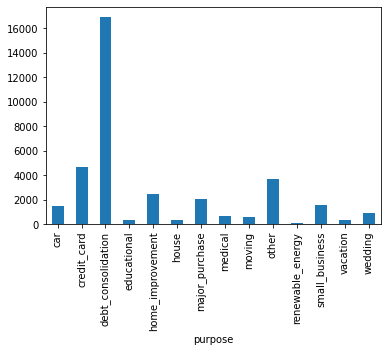

In [64]:
df.groupby('purpose')['purpose'].count().plot(kind='bar')

In [65]:
df.groupby('zip_code').count().sort_values('loan_amnt')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies,term_int,int_rate_flt,issue_year,issue_month
zip_code,,,,,,,,,,,,,,,,,,,,,
999xx,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
473xx,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
471xx,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
096xx,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
465xx,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
070xx,414,414,414,414,414,414,414,414,399,410,...,414,414,414,414,414,402,414,414,414,414
606xx,466,466,466,466,466,466,466,466,446,460,...,466,466,466,466,466,461,466,466,466,466
112xx,481,481,481,481,481,481,481,481,457,473,...,481,481,481,481,481,471,481,481,481,481


In [66]:
df.groupby('title').count().sort_values('loan_amnt')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,term_int,int_rate_flt,issue_year,issue_month
title,,,,,,,,,,,,,,,,,,,,,
Manage Money,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Private Seller Auto Loan.,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Private Student Loan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Private Student Loan Consolidation,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Private car loan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
debt consolidation,433,433,433,433,433,433,433,433,407,416,...,433,433,433,433,433,427,433,433,433,433
Consolidation,445,445,445,445,445,445,445,445,433,440,...,445,445,445,445,445,435,445,445,445,445
Personal Loan,604,604,604,604,604,604,604,604,578,586,...,604,604,604,604,604,581,604,604,604,604


The purpose column is more clearer than title. So we can drop title from our analysis

In [67]:
df=df.drop(['title'], axis = 1)

In [68]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'term_int', 'int_rate_flt', 'issue_year',
       'issue_month'],
      dtype='object')

Here the debt consolidation title is repeated in different format so we can merge them.

In [69]:
df.shape

(35947, 24)

<AxesSubplot:xlabel='addr_state'>

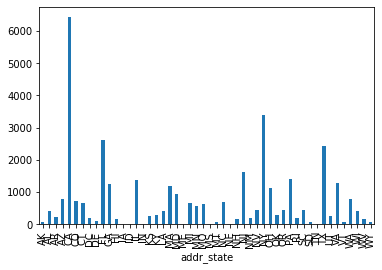

In [70]:
df.groupby('addr_state')['addr_state'].count().plot(kind='bar')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35947 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             35947 non-null  int64         
 1   funded_amnt           35947 non-null  int64         
 2   funded_amnt_inv       35947 non-null  float64       
 3   term                  35947 non-null  object        
 4   int_rate              35947 non-null  object        
 5   installment           35947 non-null  float64       
 6   grade                 35947 non-null  object        
 7   sub_grade             35947 non-null  object        
 8   emp_title             33790 non-null  object        
 9   emp_length            34945 non-null  object        
 10  home_ownership        35947 non-null  object        
 11  annual_inc            35947 non-null  float64       
 12  verification_status   35947 non-null  object        
 13  issue_d         

Upon looking on above data, emp_title,desc,pub_rec_bankruptcies have null columns. We have to look whether they impact our analysis or not.

In [72]:
df1=df[df['emp_title'].isna()]
#df1=df.groupby('emp_title').count()
df1.shape

(2157, 24)

In [73]:
len(pd.unique(df['emp_title']))

26442

In [74]:
df.groupby('emp_title')['emp_title'].count()

emp_title
  old palm inc                       1
 CenturyLink                         1
 Department of Homeland Security     1
 Down To Earth Distributors, Inc.    1
 Plaid, Inc.                         1
                                    ..
zashko inc.                          1
zeno office solutions                1
zion lutheran school                 1
zoll medical corp                    1
zozaya officiating                   1
Name: emp_title, Length: 26441, dtype: int64

As we can see there are few emp_title for which we have multiple rows but most of them has single rows. The cardinality is too high, so we can drop it from analysis.

In [75]:
df=df.drop(['emp_title'], axis = 1)

In [76]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'term_int', 'int_rate_flt', 'issue_year', 'issue_month'],
      dtype='object')

We will leave the values as it is as we are not seeing any serious impact on our analysis. We are going to use pub_rec_bankruptcies as categorical data in future. Lets start from here.

Starting the bivariate analysis. Lets see the correlation matrix first.

In [77]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,pub_rec_bankruptcies,term_int,int_rate_flt,issue_year,issue_month
loan_amnt,1.00,0.98,0.93,0.93,0.38,0.09,-0.03,0.32,0.26,0.07,0.04
funded_amnt,0.98,1.00,0.95,0.96,0.38,0.09,-0.03,0.30,0.27,0.09,0.03
funded_amnt_inv,0.93,0.95,1.00,0.89,0.36,0.10,-0.03,0.33,0.27,0.23,0.06
installment,0.93,0.96,0.89,1.00,0.38,0.08,-0.02,0.05,0.25,0.02,0.02
annual_inc,0.38,0.38,0.36,0.38,1.00,-0.07,-0.00,0.06,0.03,0.02,0.01
dti,0.09,0.09,0.10,0.08,-0.07,1.00,0.00,0.08,0.11,0.09,0.02
pub_rec_bankruptcies,-0.03,-0.03,-0.03,-0.02,-0.00,0.00,1.00,0.02,0.09,0.00,-0.02
term_int,0.32,0.30,0.33,0.05,0.06,0.08,0.02,1.00,0.42,0.23,0.03
int_rate_flt,0.26,0.27,0.27,0.25,0.03,0.11,0.09,0.42,1.00,0.02,0.02
issue_year,0.07,0.09,0.23,0.02,0.02,0.09,0.00,0.23,0.02,1.00,-0.04


### Observation is that Loan amount, investor amount, funding amount are strongly correlated.
### Annual income with DTI(Debt-to-income ratio) is negatively correalted.
### Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
### That means when annual income is low DTI is high & vice versa.
### positive correlation between annual income and employment years.
### That means income increases with work experience ;)

Here in above graph we can see the correlation among attributes but the loan_status is excluded from it.

# Birvariate analysis

Lets analyse how loan status depends on above columns

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

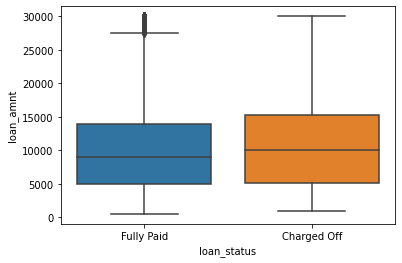

In [78]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

Here we can see loan_amnt is higher then they are more likely to Charged off or Default the loan. 

Lets try to analyze like if a particular amount of loan is given then what is % of getting it default.

In [79]:
min(df['loan_amnt']),min(df['loan_amnt'])

(500, 500)

In [80]:
max(df['loan_amnt'])

30000

<AxesSubplot:ylabel='Frequency'>

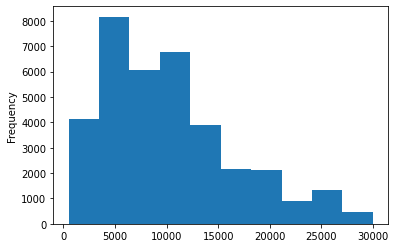

In [81]:
df['loan_amnt'].plot(kind='hist')

### Segmented UNivariate analysis

## loan Amount vs loan Status

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

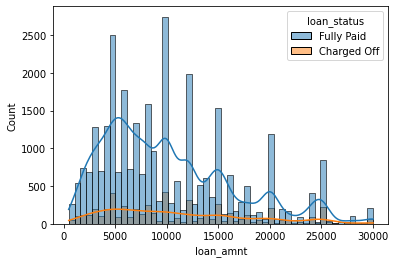

In [82]:
sns.histplot(data=df, x="loan_amnt", kde=True,hue='loan_status')

In [83]:
def loan_amnt_cat(x):
    if x>0 and x<=5000:
        return '0-5000'
    elif x>5000 and x<=10000:
        return '5000-10000'
    elif x>10000 and x<=15000:
        return '10000-15000'
    elif x>15000 and x<=20000:
        return '15000-20000'
    elif x>20000 and x<=25000:
        return '20000-25000'
    elif x>25000 and x<=30000:
        return '25000-30000'

df['loan_amt_category']=df['loan_amnt'].apply(loan_amnt_cat)

In [84]:
df1=df.groupby(['loan_amt_category','loan_status'])['loan_amt_category'].count().rename('cnt_amt_stat')
df1=df1.reset_index(level=['loan_amt_category','loan_status'])
df1=pd.DataFrame(df1)
df1.columns

Index(['loan_amt_category', 'loan_status', 'cnt_amt_stat'], dtype='object')

In [85]:
df2=df.groupby(['loan_amt_category'])['loan_amt_category'].count().rename('cnt_amt')
df2=df2.reset_index(level=['loan_amt_category'])
df2=pd.DataFrame(df2)
df2.columns

Index(['loan_amt_category', 'cnt_amt'], dtype='object')

In [86]:
df3=pd.merge(df1,df2,on='loan_amt_category')
df3['percentage']=(df3['cnt_amt_stat']*100)/df3['cnt_amt']
df3['start_amt']=df3['loan_amt_category'].apply(lambda x:int(x.split('-')[0]))
df3=df3.sort_values('start_amt')
df3

,loan_amt_category,loan_status,cnt_amt_stat,cnt_amt,percentage,start_amt
0,0-5000,Charged Off,1299,9305,13.960236,0
1,0-5000,Fully Paid,8006,9305,86.039764,0
10,5000-10000,Charged Off,1601,12384,12.927972,5000
11,5000-10000,Fully Paid,10783,12384,87.072028,5000
2,10000-15000,Charged Off,1022,7288,14.023052,10000
3,10000-15000,Fully Paid,6266,7288,85.976948,10000
4,15000-20000,Charged Off,721,4022,17.926405,15000
5,15000-20000,Fully Paid,3301,4022,82.073595,15000
6,20000-25000,Charged Off,481,2381,20.201596,20000
7,20000-25000,Fully Paid,1900,2381,79.798404,20000


In [87]:
sns.set(rc={'figure.figsize':(11,8)})

<AxesSubplot:xlabel='loan_amt_category', ylabel='percentage'>

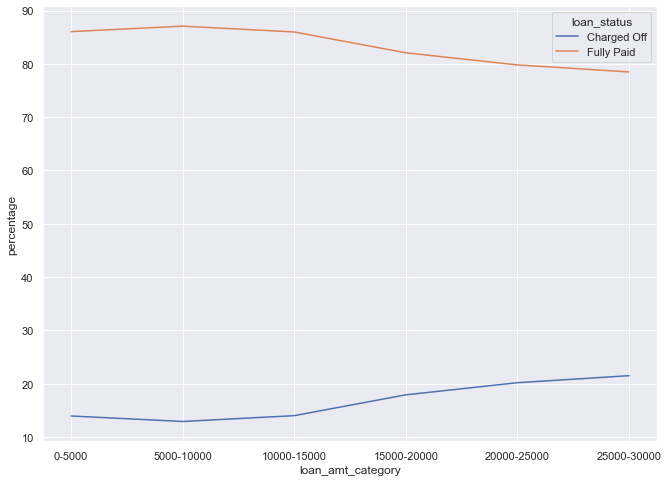

In [88]:
sns.lineplot(data=df3, x="loan_amt_category", y="percentage",hue='loan_status')

We clearly see here that as the loan amount increases the chances of going default increases and also decreases the chances of getting it fully paid. To know the percentage in each category.

In [89]:
df3[['loan_amt_category','loan_status','percentage']]

,loan_amt_category,loan_status,percentage
0,0-5000,Charged Off,13.960236
1,0-5000,Fully Paid,86.039764
10,5000-10000,Charged Off,12.927972
11,5000-10000,Fully Paid,87.072028
2,10000-15000,Charged Off,14.023052
3,10000-15000,Fully Paid,85.976948
4,15000-20000,Charged Off,17.926405
5,15000-20000,Fully Paid,82.073595
6,20000-25000,Charged Off,20.201596
7,20000-25000,Fully Paid,79.798404


Above we can see that if a loan is taken between amount 15000-20000 then pecentage of it getting fully paid is 82% and percentage of getting it charged off is 17.9~18%. Similarly we can detect it for other categories also. 

We can see that loan taken between amount 5000-10000 has highest chances that it will be fully paid. and for amount 25000-30000 has highest chances of being Charged off.

the 3 columns loan_amnt,funded_amnt,funded_amnt_inv have same set of values and there fore same impact on loan status

## Annucal income vs loan Status

<AxesSubplot:ylabel='annual_inc'>

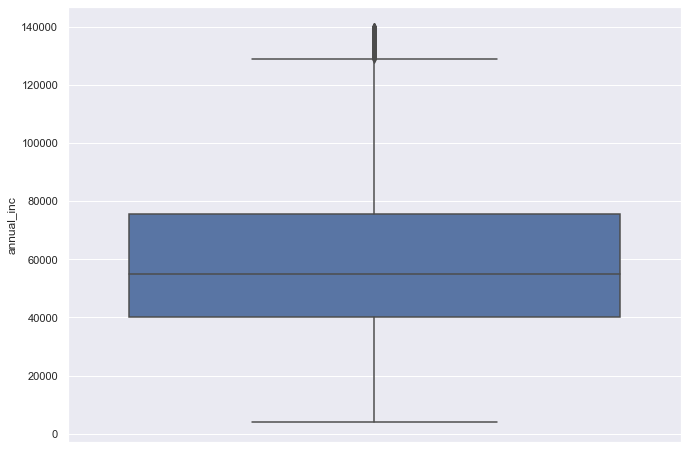

In [90]:
sns.boxplot(data=df, y='annual_inc')#, y='annual_inc',hue='loan_amnt')

there is vast range of values for annual income. lets filter out outliers and then create range of annual_incomes

<AxesSubplot:ylabel='Frequency'>

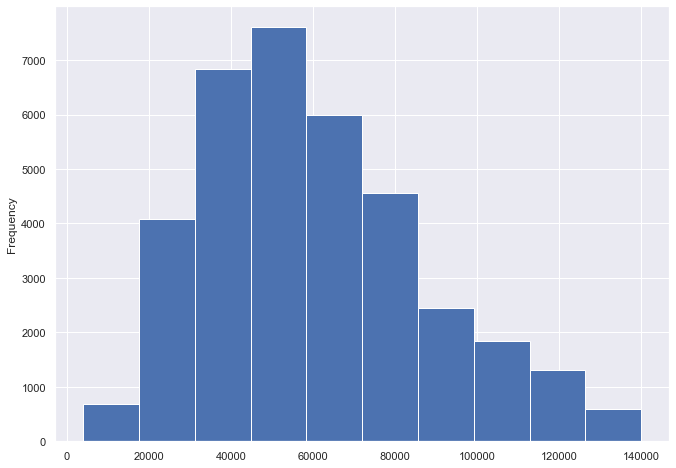

In [91]:
df['annual_inc'].plot(kind='hist')

In [92]:
def annual_inc_cat(x):
    if x>0 and x<=20000:
        return '0-20000'
    elif x>20000 and x<=40000:
        return '20000-40000'
    elif x>40000 and x<=60000:
        return '40000-60000'
    elif x>60000 and x<=80000:
        return '60000-80000'
    elif x>80000 and x<=100000:
        return '80000-100000'
    elif x>100000 and x<=120000:
        return '100000-120000'
    elif x>120000 and x<=140000:
        return '120000-140000'

df['annual_inc_cat']=df['annual_inc'].apply(annual_inc_cat)

In [93]:
df4=df.groupby(['annual_inc_cat','loan_status'])['annual_inc_cat'].count().rename('cnt_annual_inc_cat_stat')
df4=df4.reset_index(level=['annual_inc_cat','loan_status'])

df5=df.groupby(['annual_inc_cat'])['annual_inc_cat'].count().rename('cnt_annual_inc')
df5=df5.reset_index(level=['annual_inc_cat'])
df5=pd.DataFrame(df5)
df5.columns

df6=pd.merge(df4,df5,on='annual_inc_cat')
df6['percentage']=(df6['cnt_annual_inc_cat_stat']*100)/df6['cnt_annual_inc']
df6['start_ann']=df6['annual_inc_cat'].apply(lambda x:int(x.split('-')[0]))
df6=df6.sort_values('start_ann')
df6

,annual_inc_cat,loan_status,cnt_annual_inc_cat_stat,cnt_annual_inc,percentage,start_ann
0,0-20000,Charged Off,237,1180,20.084746,0
1,0-20000,Fully Paid,943,1180,79.915254,0
6,20000-40000,Charged Off,1514,8518,17.774125,20000
7,20000-40000,Fully Paid,7004,8518,82.225875,20000
8,40000-60000,Charged Off,1713,11229,15.255143,40000
9,40000-60000,Fully Paid,9516,11229,84.744857,40000
10,60000-80000,Charged Off,974,7478,13.024873,60000
11,60000-80000,Fully Paid,6504,7478,86.975127,60000
12,80000-100000,Charged Off,486,4346,11.182697,80000
13,80000-100000,Fully Paid,3860,4346,88.817303,80000


<AxesSubplot:xlabel='annual_inc_cat', ylabel='percentage'>

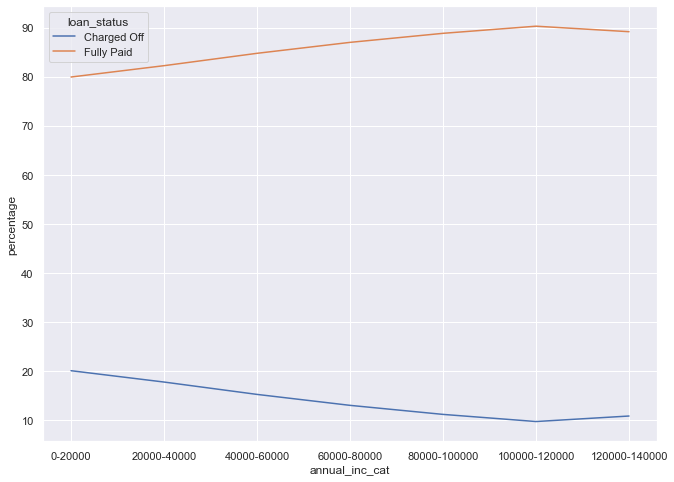

In [94]:
sns.lineplot(data=df6, x="annual_inc_cat", y="percentage",hue='loan_status')

In [95]:
df6[['annual_inc_cat','loan_status','percentage']]

,annual_inc_cat,loan_status,percentage
0,0-20000,Charged Off,20.084746
1,0-20000,Fully Paid,79.915254
6,20000-40000,Charged Off,17.774125
7,20000-40000,Fully Paid,82.225875
8,40000-60000,Charged Off,15.255143
9,40000-60000,Fully Paid,84.744857
10,60000-80000,Charged Off,13.024873
11,60000-80000,Fully Paid,86.975127
12,80000-100000,Charged Off,11.182697
13,80000-100000,Fully Paid,88.817303


Here we observed a completely opposite trend as compared to loan amount vs loan status. Above we can see that if a annual income is between amount 80000-100000 then pecentage of it getting fully paid is 88.8%=89% and percentage of getting it charged off is 11.1=11%. Similarly we can detect it for other categories also. 

We can see that annual income between 100000-1200000 has highest chances that it will be fully paid. and for annual 0-20000 has highest chances of being Charged off.

## Debt To Income Ratio vs loan status

<AxesSubplot:ylabel='Frequency'>

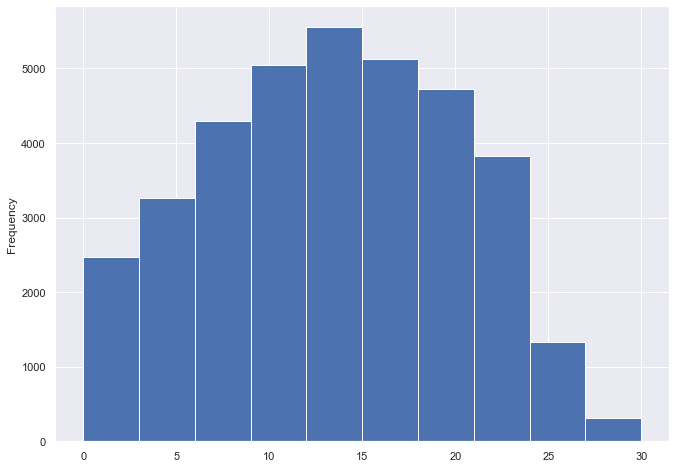

In [96]:
df['dti'].plot(kind='hist')

<AxesSubplot:xlabel='dti', ylabel='Count'>

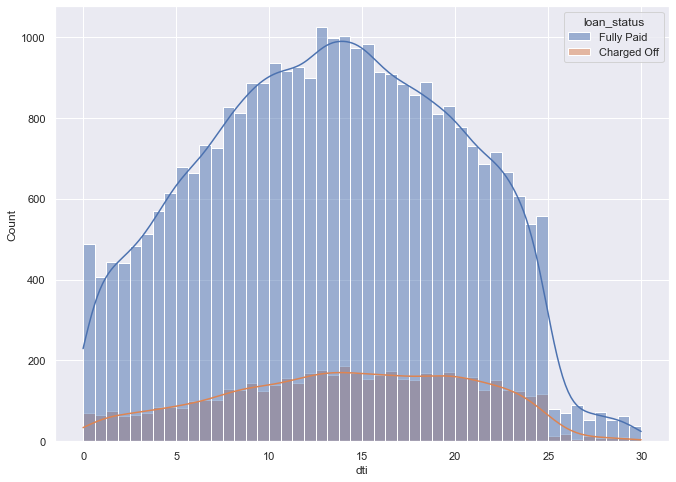

In [97]:
sns.histplot(data=df, x="dti", kde=True,hue='loan_status')

From the above graph we observer that when the dti value is low from 0 to 15, the gap between the charged off line and fully paid is increasing. This means that while moving from dti value 0 to 15 there are higher chances that loan will be fully paid by borrower. From dti value 15-30 , we clearly see the gap between lines decreasing and borrower is more likely to default the loan. To get the exact % in each category, lets get the % of fully charged and charged off.

In [98]:
def dti_cat(x):
    if x>0 and x<=5:
        return '0-5'
    elif x>5 and x<=10:
        return '5-10'
    elif x>10 and x<=15:
        return '10-15'
    elif x>15 and x<=20:
        return '15-20'
    elif x>20 and x<=25:
        return '20-25'
    elif x>25 and x<=30:
        return '25-30'


df['dti_cat']=df['dti'].apply(dti_cat)
df7=df.groupby(['dti_cat','loan_status'])['dti_cat'].count().rename('cnt_dti_cat_stat')
df7=df7.reset_index(level=['dti_cat','loan_status'])

df8=df.groupby(['dti_cat'])['dti_cat'].count().rename('cnt_dti')
df8=df8.reset_index(level=['dti_cat'])
df8=pd.DataFrame(df8)
df8.columns

df9=pd.merge(df7,df8,on='dti_cat')
df9['percentage']=(df9['cnt_dti_cat_stat']*100)/df9['cnt_dti']
df9['start_dti']=df9['dti_cat'].apply(lambda x:int(x.split('-')[0]))
df9=df9.sort_values('start_dti')
df9

,dti_cat,loan_status,cnt_dti_cat_stat,cnt_dti,percentage,start_dti
0,0-5,Charged Off,548,4379,12.514273,0
1,0-5,Fully Paid,3831,4379,87.485727,0
10,5-10,Charged Off,914,7128,12.822671,5
11,5-10,Fully Paid,6214,7128,87.177329,5
2,10-15,Charged Off,1306,8982,14.540191,10
3,10-15,Fully Paid,7676,8982,85.459809,10
4,15-20,Charged Off,1296,8355,15.511670,15
5,15-20,Fully Paid,7059,8355,84.488330,15
6,20-25,Charged Off,1073,6334,16.940322,20
7,20-25,Fully Paid,5261,6334,83.059678,20


Here we get the answer for our question like if dti value falls in particular range then what is % of getting it charged off or fully paid

## Interest rate vs Loan Status

<AxesSubplot:xlabel='int_rate_flt', ylabel='Count'>

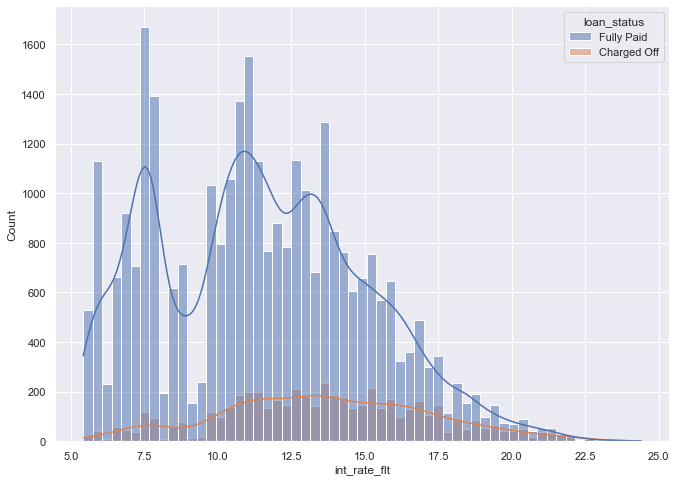

In [99]:
sns.histplot(data=df, x="int_rate_flt", kde=True,hue='loan_status')

--

In [100]:
def int_rate_flt_cat(x):
    if x>5 and x<=7.5:
        return '0-5'
    elif x>7.5 and x<=10.0:
        return '5-10'
    elif x>10.0 and x<=12.5:
        return '10-15'
    elif x>12.5 and x<=15.0:
        return '15-20'
    elif x>15.0 and x<=17.5:
        return '20-25'
    elif x>17.5 and x<=20.0:
        return '25-30'
    elif x>20.0 and x<=22.5:
        return '25-30'
    elif x>22.5 and x<=25:
        return '25-30'


df['int_rate_flt_cat']=df['int_rate_flt'].apply(dti_cat)
df10=df.groupby(['int_rate_flt_cat','loan_status'])['int_rate_flt_cat'].count().rename('cnt_int_rate_flt_cat_stat')
df10=df10.reset_index(level=['int_rate_flt_cat','loan_status'])

df11=df.groupby(['int_rate_flt_cat'])['int_rate_flt_cat'].count().rename('cnt_int_rate_flt')
df11=df11.reset_index(level=['int_rate_flt_cat'])
df11=pd.DataFrame(df11)
df11.columns

df12=pd.merge(df10,df11,on='int_rate_flt_cat')
df12['percentage']=(df12['cnt_int_rate_flt_cat_stat']*100)/df12['cnt_int_rate_flt']
df12['start_int_rate']=df12['int_rate_flt_cat'].apply(lambda x:int(x.split('-')[0]))
df12=df12.sort_values('start_int_rate')
df12

,int_rate_flt_cat,loan_status,cnt_int_rate_flt_cat_stat,cnt_int_rate_flt,percentage,start_int_rate
6,5-10,Charged Off,809,11727,6.898610,5
7,5-10,Fully Paid,10918,11727,93.101390,5
0,10-15,Charged Off,2579,17128,15.057216,10
1,10-15,Fully Paid,14549,17128,84.942784,10
2,15-20,Charged Off,1631,6510,25.053763,15
3,15-20,Fully Paid,4879,6510,74.946237,15
4,20-25,Charged Off,227,582,39.003436,20
5,20-25,Fully Paid,355,582,60.996564,20


Here we get the answer for our question like if dti value falls in particular range then what is % of getting it charged off or fully paid

<AxesSubplot:xlabel='int_rate_flt_cat', ylabel='percentage'>

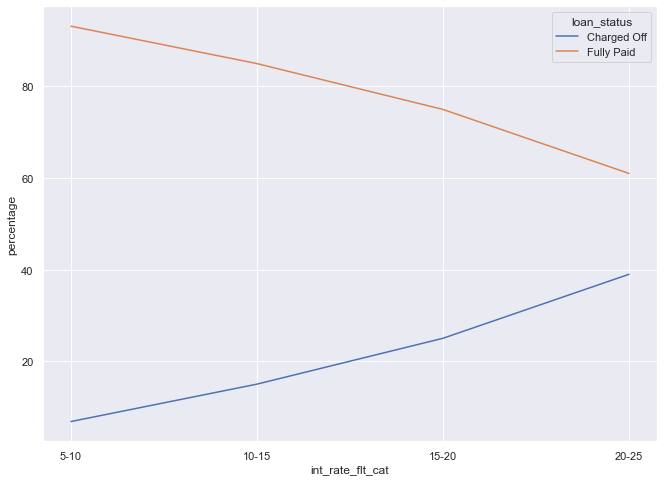

In [101]:
sns.lineplot(data=df12, x="int_rate_flt_cat", y="percentage",hue='loan_status')

This is completely showing that as the interest rate goes higher it is more likely to get default as compared to lower interest rates

## Employee length of service vs loan status

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

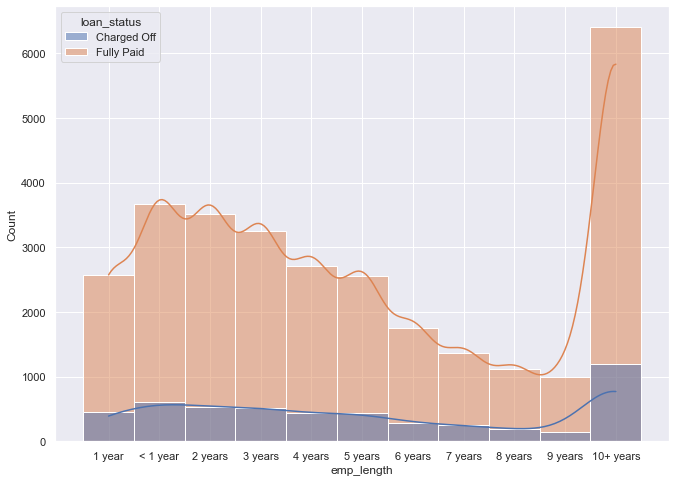

In [115]:
df['emp_length_int']=df['emp_length'].apply(lambda x: int(x.replace('years','').replace('<','').replace('+','').replace('year','').strip()) if x is not np.nan else 0)
df=df.sort_values('emp_length_int')
sns.histplot(data=df, x="emp_length", kde=True,hue='loan_status')

In [116]:
pd.unique(df['emp_length'])

array([nan, '1 year', '< 1 year', '2 years', '3 years', '4 years',
       '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
      dtype=object)

The above graph shows that we have large number of fully paid borrowers than charged off. Lets see in terms of percentage.

In [117]:
df13=df.groupby(['emp_length','loan_status'])['emp_length'].count().rename('cnt_emp_length_stat')
df13=df13.reset_index(level=['emp_length','loan_status'])

df14=df.groupby(['emp_length'])['emp_length'].count().rename('cnt_emp_length')
df14=df14.reset_index(level=['emp_length'])
df14=pd.DataFrame(df14)
df14.columns

df15=pd.merge(df13,df14,on='emp_length')
df15['percentage']=(df15['cnt_emp_length_stat']*100)/df15['cnt_emp_length']
df15['emp_length_int']=df15['emp_length'].apply(lambda x: (x.replace('years','').replace('>','').replace('+','')).strip() if x is not np.nan else 0)
df15=df15.sort_values('emp_length_int')
df15

,emp_length,loan_status,cnt_emp_length_stat,cnt_emp_length,percentage,emp_length_int
0,1 year,Charged Off,445,3017,14.749751,1 year
1,1 year,Fully Paid,2572,3017,85.250249,1 year
2,10+ years,Charged Off,1199,7605,15.765943,10
3,10+ years,Fully Paid,6406,7605,84.234057,10
4,2 years,Charged Off,536,4053,13.224772,2
5,2 years,Fully Paid,3517,4053,86.775228,2
6,3 years,Charged Off,519,3766,13.781200,3
7,3 years,Fully Paid,3247,3766,86.218800,3
8,4 years,Charged Off,430,3144,13.676845,4
9,4 years,Fully Paid,2714,3144,86.323155,4


In terms of percentage of in different employee length categories we see the fully paid borrwers % varies between 84 to 87 % and charged of borrowers lies between 13 to 16%. Its more of same for all. Very little difference.

<AxesSubplot:xlabel='emp_length', ylabel='percentage'>

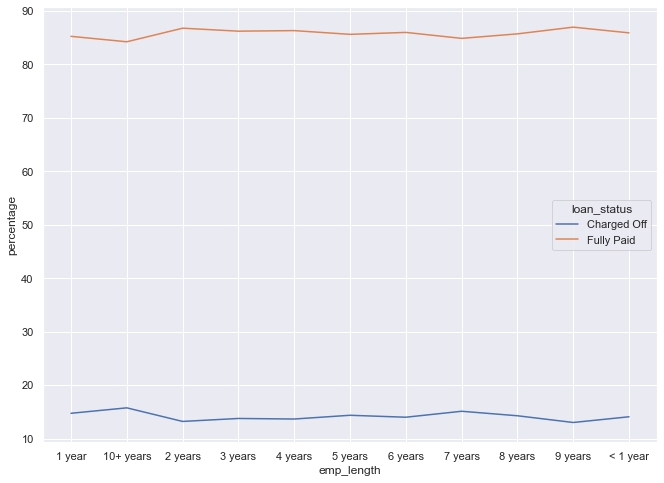

In [118]:
sns.lineplot(data=df15,x='emp_length',y='percentage',hue='loan_status')

## Grade vs loan_status

<AxesSubplot:xlabel='grade', ylabel='Count'>

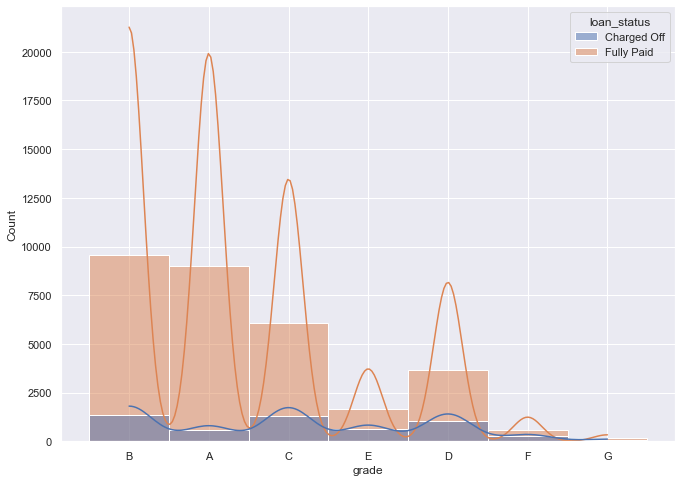

In [119]:
sns.histplot(data=df, x="grade", kde=True,hue='loan_status')

Here We are not seeing much trend in plot

In [120]:
df131=df.groupby(['grade','loan_status'])['grade'].count().rename('cnt_grade_stat')
df131=df131.reset_index(level=['grade','loan_status'])

df141=df.groupby(['grade'])['grade'].count().rename('cnt_grade')
df141=df141.reset_index(level=['grade'])
df141=pd.DataFrame(df141)
df141.columns

df151=pd.merge(df131,df141,on='grade')
df151['percentage']=(df151['cnt_grade_stat']*100)/df151['cnt_grade']

df151

,grade,loan_status,cnt_grade_stat,cnt_grade,percentage
0,A,Charged Off,591,9570,6.175549
1,A,Fully Paid,8979,9570,93.824451
2,B,Charged Off,1353,10940,12.367459
3,B,Fully Paid,9587,10940,87.632541
4,C,Charged Off,1293,7362,17.563162
5,C,Fully Paid,6069,7362,82.436838
6,D,Charged Off,1050,4730,22.198732
7,D,Fully Paid,3680,4730,77.801268
8,E,Charged Off,615,2292,26.832461
9,E,Fully Paid,1677,2292,73.167539


In terms of percentage of in different grade of borrowers, we see that borrowers with good grade are more like to fully pay the loan. With each grade you can see 4%-5% drop in percentage of people paying the whole loan and 4%-5% increase in people will not pay the loan.

GRADE is key factor while approving loan to borrowers


<AxesSubplot:xlabel='grade', ylabel='percentage'>

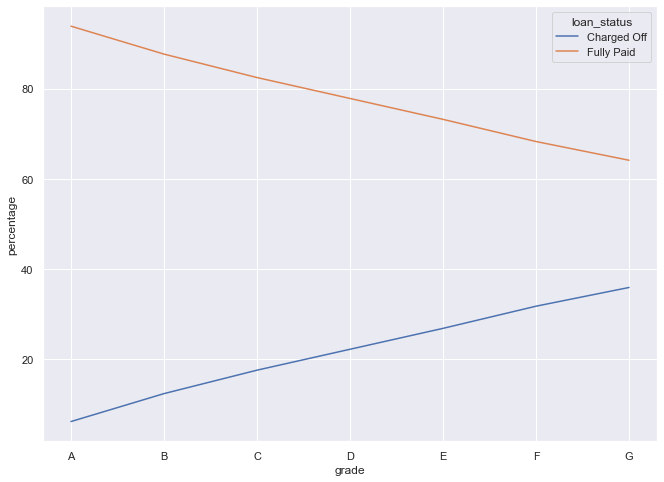

In [121]:
sns.lineplot(data=df151,x='grade',y='percentage',hue='loan_status')

In [122]:
df132=df.groupby(['sub_grade','loan_status'])['sub_grade'].count().rename('cnt_sub_grade_stat')
df132=df132.reset_index(level=['sub_grade','loan_status'])

df142=df.groupby(['sub_grade'])['sub_grade'].count().rename('cnt_sub_grade')
df142=df142.reset_index(level=['sub_grade'])
df142=pd.DataFrame(df142)
df142.columns

df152=pd.merge(df132,df142,on='sub_grade')
df152['percentage']=(df152['cnt_sub_grade_stat']*100)/df152['cnt_sub_grade']

df152

,sub_grade,loan_status,cnt_sub_grade_stat,cnt_sub_grade,percentage
0,A1,Charged Off,30,1094,2.742230
1,A1,Fully Paid,1064,1094,97.257770
2,A2,Charged Off,74,1442,5.131761
3,A2,Fully Paid,1368,1442,94.868239
4,A3,Charged Off,103,1745,5.902579
...,...,...,...,...,...
65,G3,Fully Paid,19,36,52.777778
66,G4,Charged Off,9,42,21.428571
67,G4,Fully Paid,33,42,78.571429
68,G5,Charged Off,9,21,42.857143


<AxesSubplot:xlabel='sub_grade', ylabel='percentage'>

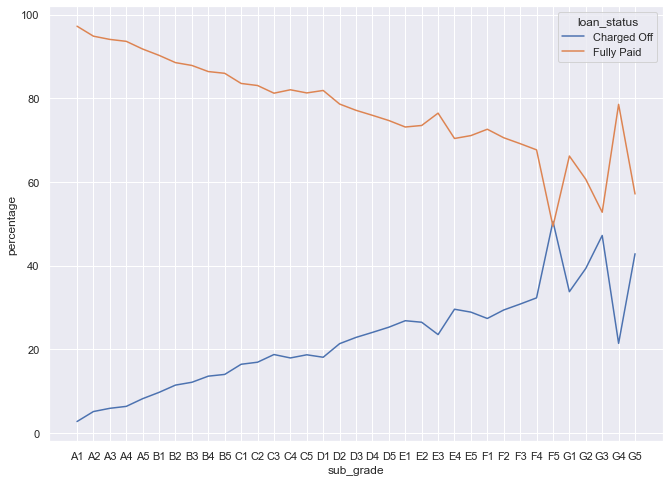

In [123]:
sns.lineplot(data=df152,x='sub_grade',y='percentage',hue='loan_status')

Here we can see that while analysing the grades we got straight line but within grade G we are getting some unexpected result. Till F grade we can use the grade column and G grade we can deep dive into subgrades.

In [124]:
df152[df152['sub_grade'].str.contains('G')]

,sub_grade,loan_status,cnt_sub_grade_stat,cnt_sub_grade,percentage
60,G1,Charged Off,25,74,33.783784
61,G1,Fully Paid,49,74,66.216216
62,G2,Charged Off,24,61,39.344262
63,G2,Fully Paid,37,61,60.655738
64,G3,Charged Off,17,36,47.222222
65,G3,Fully Paid,19,36,52.777778
66,G4,Charged Off,9,42,21.428571
67,G4,Fully Paid,33,42,78.571429
68,G5,Charged Off,9,21,42.857143
69,G5,Fully Paid,12,21,57.142857


So within G grade, we can see the subgrade G4 has good % of getting the loan paid fully and G3 has least chance.

In [125]:
df_pur=df.groupby(['purpose','loan_status'])['purpose'].count().rename('cnt_purpose_stat')
df_pur=df_pur.reset_index(level=['purpose','loan_status'])

df_pur1=df.groupby(['purpose'])['purpose'].count().rename('cnt_purpose')
df_pur1=df_pur1.reset_index(level=['purpose'])
df_pur1=pd.DataFrame(df_pur1)
df_pur1.columns

df_pur2=pd.merge(df_pur,df_pur1,on='purpose')
df_pur2['percentage']=(df_pur2['cnt_purpose_stat']*100)/df_pur2['cnt_purpose']

df_pur2=df_pur2.sort_values('percentage')
df_pur2

,purpose,loan_status,cnt_purpose_stat,cnt_purpose,percentage
26,wedding,Charged Off,90,883,10.192525
12,major_purchase,Charged Off,215,2024,10.622530
2,credit_card,Charged Off,505,4698,10.749255
0,car,Charged Off,159,1444,11.011080
8,home_improvement,Charged Off,311,2490,12.489960
24,vacation,Charged Off,52,364,14.285714
4,debt_consolidation,Charged Off,2579,16912,15.249527
10,house,Charged Off,52,329,15.805471
14,medical,Charged Off,101,635,15.905512
18,other,Charged Off,599,3664,16.348253


<AxesSubplot:xlabel='percentage', ylabel='purpose'>

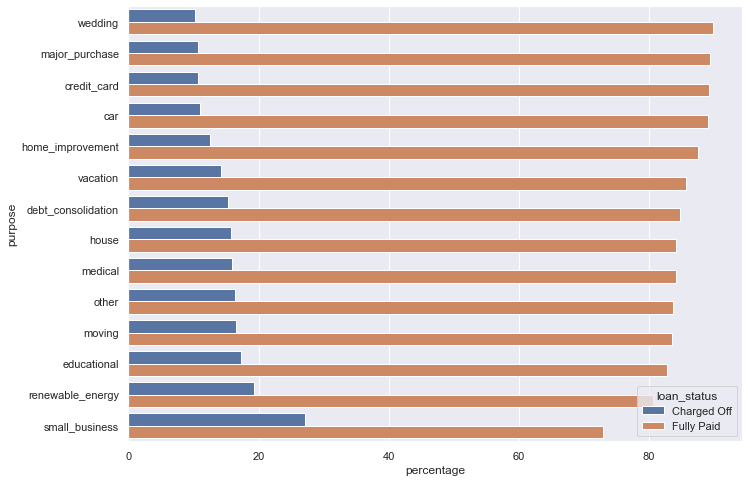

In [126]:
sns.barplot(data=df_pur2,y='purpose',x='percentage',hue='loan_status')

We can see from the plot that loan for the purpose of wedding is more likely to be fully paid. Loan for the purpose of small_businesses are more likely to default. The borrower mentioning purpose wedding,major_purchase, credit_card or car  have almost same chances of getting it fully paid.

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

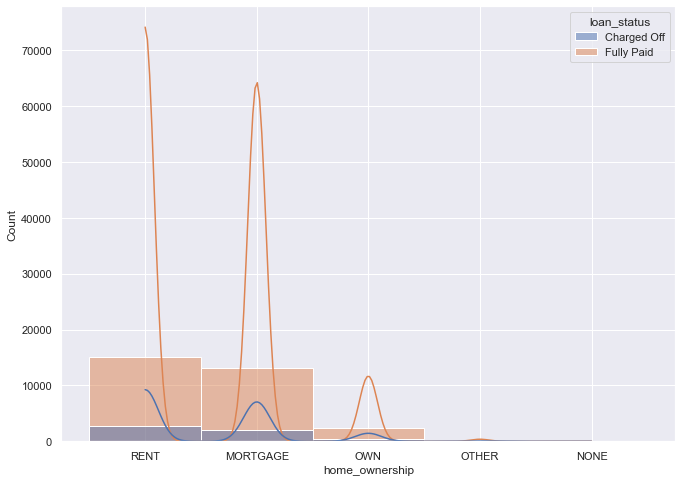

In [128]:
sns.histplot(data=df, x="home_ownership", kde=True,hue='loan_status')

In [129]:
df_ho=df.groupby(['home_ownership','loan_status'])['home_ownership'].count().rename('cnt_home_ownership_stat')
df_ho=df_ho.reset_index(level=['home_ownership','loan_status'])

df_ho1=df.groupby(['home_ownership'])['home_ownership'].count().rename('cnt_home_ownership')
df_ho1=df_ho1.reset_index(level=['home_ownership'])
df_ho1=pd.DataFrame(df_ho1)
df_ho1.columns

df_ho2=pd.merge(df_ho,df_ho1,on='home_ownership')
df_ho2['percentage']=(df_ho2['cnt_home_ownership_stat']*100)/df_ho2['cnt_home_ownership']

df_ho2=df_ho2.sort_values('percentage')
df_ho2

,home_ownership,loan_status,cnt_home_ownership_stat,cnt_home_ownership,percentage
0,MORTGAGE,Charged Off,2080,15198,13.686011
5,OWN,Charged Off,422,2805,15.044563
7,RENT,Charged Off,2727,17849,15.278167
3,OTHER,Charged Off,17,92,18.478261
4,OTHER,Fully Paid,75,92,81.521739
8,RENT,Fully Paid,15122,17849,84.721833
6,OWN,Fully Paid,2383,2805,84.955437
1,MORTGAGE,Fully Paid,13118,15198,86.313989
2,NONE,Fully Paid,3,3,100.000000


<AxesSubplot:xlabel='home_ownership', ylabel='percentage'>

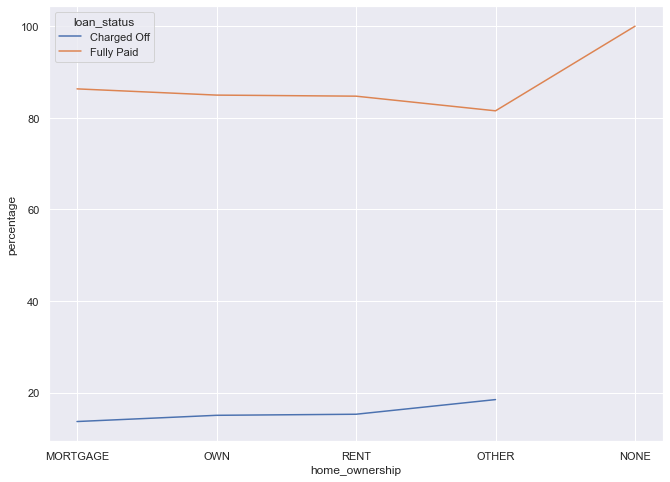

In [130]:
sns.lineplot(data=df_ho2,x='home_ownership',y='percentage',hue='loan_status')

If we ignore the None , category then we can see that borrower with mortgage has slightly more chance to pay the loan successfully while other category has less chances of getting it paid.

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

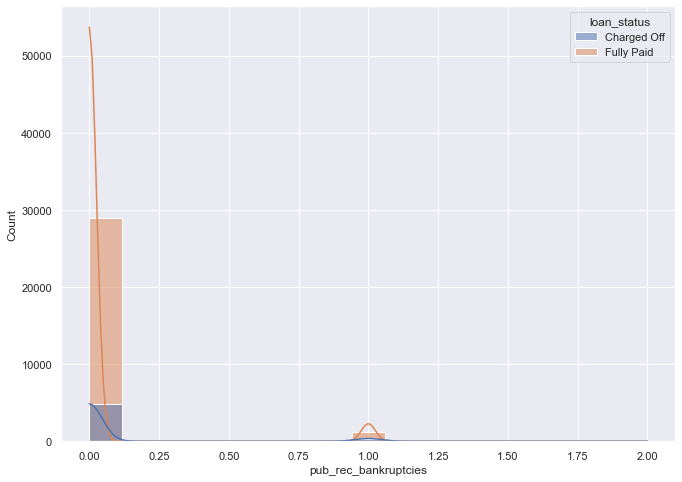

In [131]:
sns.histplot(data=df, x="pub_rec_bankruptcies", kde=True,hue='loan_status')

Here we can observer that people with zero public recorded bankruptcies are more likely to pay the full loan.

<AxesSubplot:xlabel='verification_status', ylabel='Count'>

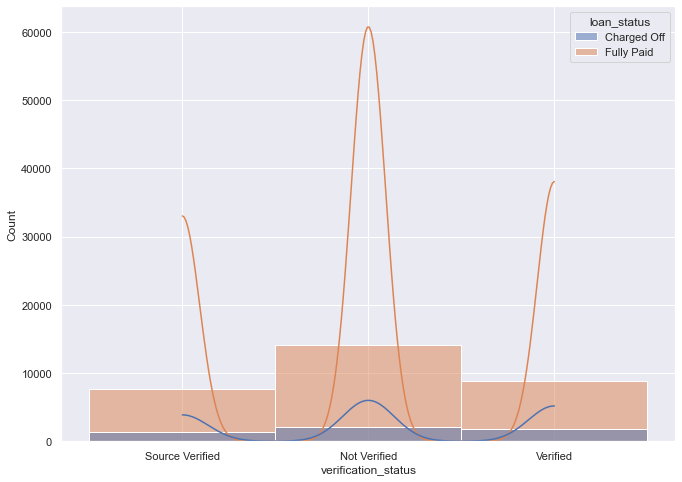

In [132]:
sns.histplot(data=df, x="verification_status", kde=True,hue='loan_status')

In [133]:
df_vs=df.groupby(['verification_status','loan_status'])['verification_status'].count().rename('cnt_verification_status_stat')
df_vs=df_vs.reset_index(level=['verification_status','loan_status'])

df_vs1=df.groupby(['verification_status'])['verification_status'].count().rename('cnt_verification_status')
df_vs1=df_vs1.reset_index(level=['verification_status'])
df_vs1=pd.DataFrame(df_vs1)
df_vs1.columns

df_vs2=pd.merge(df_vs,df_vs1,on='verification_status')
df_vs2['percentage']=(df_vs2['cnt_verification_status_stat']*100)/df_vs2['cnt_verification_status']

df_vs2=df_vs2.sort_values('percentage')
df_vs2

,verification_status,loan_status,cnt_verification_status_stat,cnt_verification_status,percentage
0,Not Verified,Charged Off,2090,16240,12.869458
2,Source Verified,Charged Off,1350,9039,14.935280
4,Verified,Charged Off,1806,10668,16.929134
5,Verified,Fully Paid,8862,10668,83.070866
3,Source Verified,Fully Paid,7689,9039,85.064720
1,Not Verified,Fully Paid,14150,16240,87.130542


<AxesSubplot:xlabel='verification_status', ylabel='percentage'>

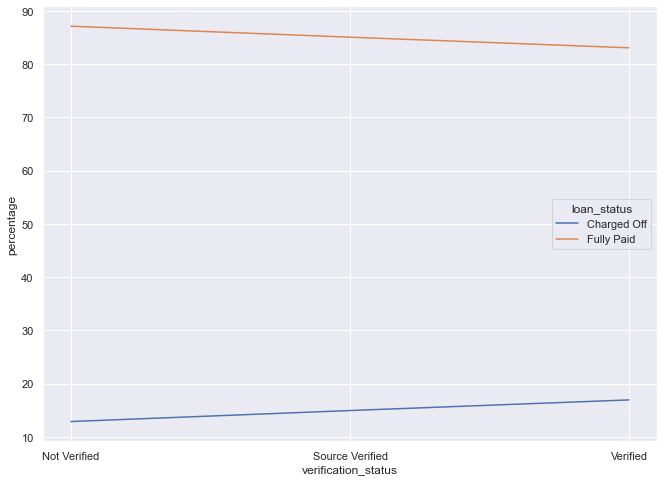

In [134]:
sns.lineplot(data=df_vs2,x='verification_status',y='percentage',hue='loan_status')

There is 2% more confidence on borrower who are not verified that they can pay the full loan as compared to source verified. 

<AxesSubplot:xlabel='Count', ylabel='addr_state'>

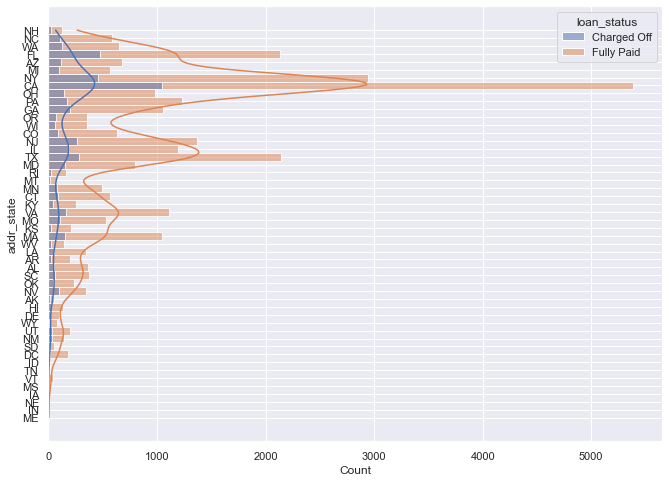

In [135]:
sns.histplot(data=df, y="addr_state", kde=True,hue='loan_status')

CA state has maximum number of borrowers.

In [136]:
df_as=df.groupby(['addr_state','loan_status'])['addr_state'].count().rename('cnt_addr_state_stat')
df_as=df_as.reset_index(level=['addr_state','loan_status'])

df_as1=df.groupby(['addr_state'])['addr_state'].count().rename('cnt_addr_state')
df_as1=df_as1.reset_index(level=['addr_state'])
df_as1=pd.DataFrame(df_as1)
df_as1.columns

df_as2=pd.merge(df_as,df_as1,on='addr_state')
df_as2['percentage']=(df_as2['cnt_addr_state_stat']*100)/df_as2['cnt_addr_state']

df_as2=df_as2.sort_values('percentage')
df_as2

,addr_state,loan_status,cnt_addr_state_stat,cnt_addr_state,percentage
95,WY,Charged Off,3,78,3.846154
14,DC,Charged Off,12,190,6.315789
47,MS,Charged Off,2,19,10.526316
16,DE,Charged Off,12,108,11.111111
4,AR,Charged Off,26,226,11.504425
...,...,...,...,...,...
15,DC,Fully Paid,178,190,93.684211
96,WY,Fully Paid,75,78,96.153846
29,IN,Fully Paid,9,9,100.000000
24,IA,Fully Paid,5,5,100.000000


<AxesSubplot:xlabel='addr_state', ylabel='percentage'>

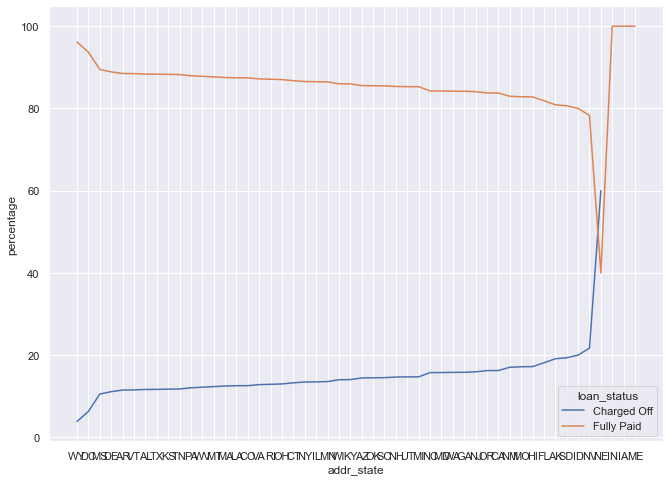

In [137]:
sns.lineplot(data=df_as2,x='addr_state',y='percentage',hue='loan_status')

The loans in state IN, IA and ME are fully paid. there are no defaulters in that state.

If I plot the number of states have more than 90% of loan which was fully paid by borrowers. We can get below visualisation and see that only DC, WY, IN, IA and ME qualifies into that creteria


<AxesSubplot:xlabel='addr_state', ylabel='percentage'>

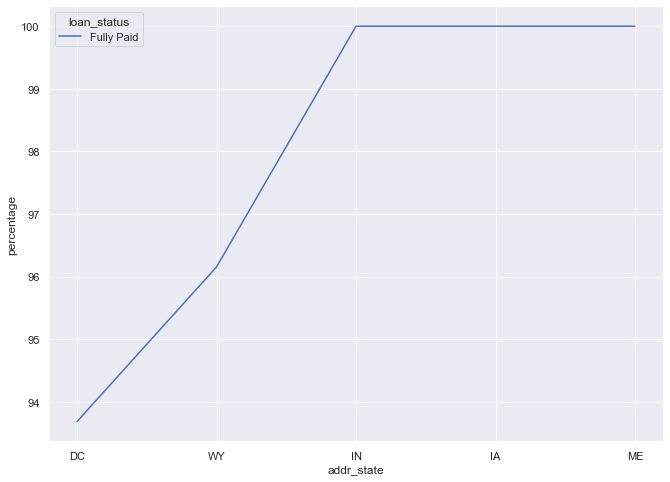

In [138]:
sns.lineplot(data=df_as2[df_as2['percentage']>90],x='addr_state',y='percentage',hue='loan_status')

# Bivariate Analysis without loan Status

#### loan amount vs installment

<AxesSubplot:xlabel='loan_amt_category', ylabel='installment'>

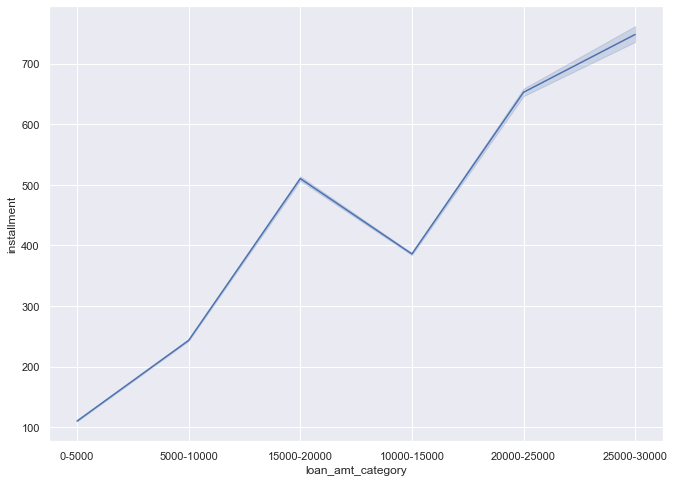

In [139]:
sns.lineplot(data=df, x='loan_amt_category', y='installment')

We can observer that as the loan amount increases the installment increases.

### Loan amount vs interest rate

<AxesSubplot:xlabel='loan_amt_category', ylabel='int_rate_flt'>

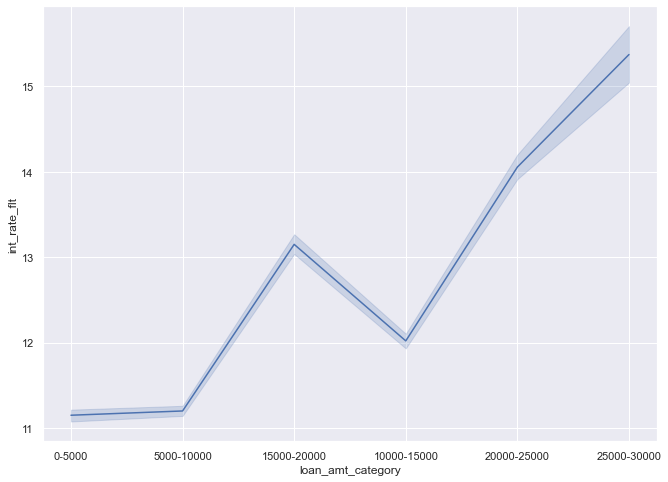

In [140]:
sns.lineplot(data=df, x='loan_amt_category', y='int_rate_flt')

Large amount loans are dispursed at higher interest rate.

### loan amount vs funded amount invested

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='loan_amnt'>

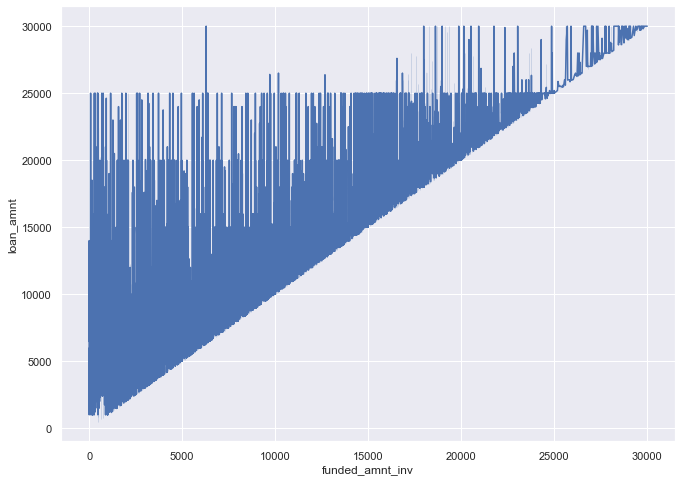

In [141]:
sns.lineplot(data=df, x='funded_amnt_inv', y='loan_amnt')

Both are directly proportional to each other.

#### laon amount vs issue Year

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

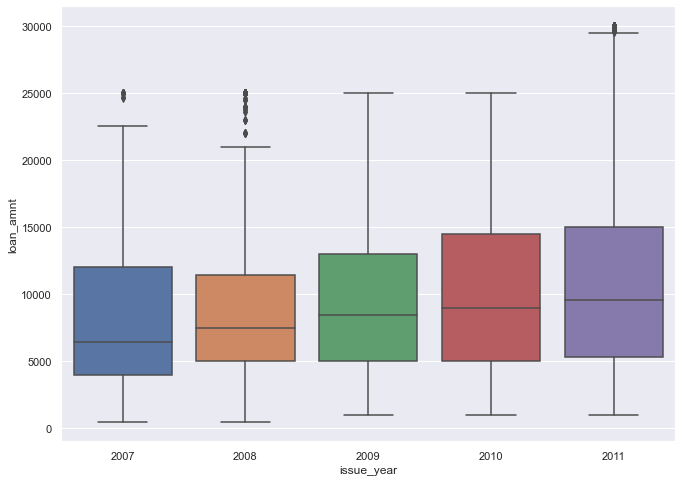

In [142]:
sns.boxplot(data=df, y='loan_amnt', x='issue_year')

Year by year the amount of loan increases. But the 75th percentile for 2008 is lowest among all.

#### loan amount vs purpose

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

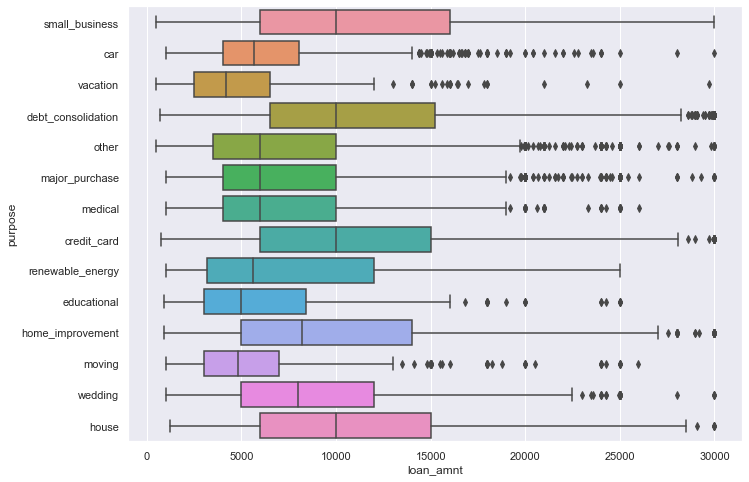

In [143]:
sns.boxplot(data=df, x='loan_amnt', y='purpose')

Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
Debt consolidation is second and Credit card comes 3rd.

#### loan amount vs term

<AxesSubplot:xlabel='loan_amnt', ylabel='term'>

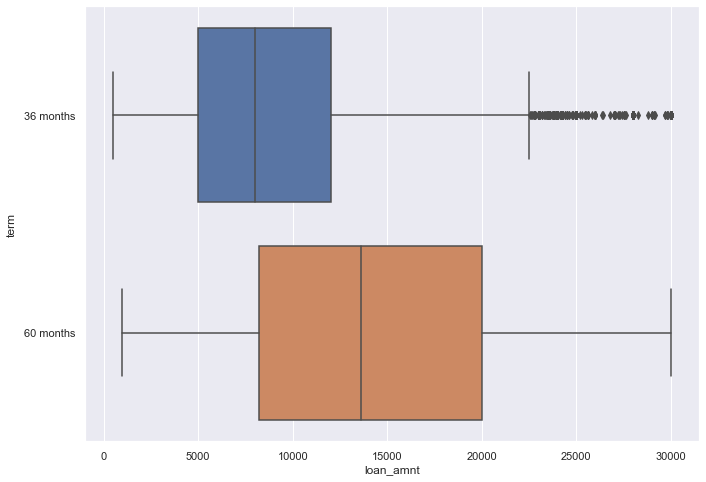

In [144]:
sns.boxplot(data=df, x='loan_amnt', y='term')

loans with bigger amounts has been given for long term

#### loan amount vs grade

<AxesSubplot:xlabel='loan_amnt', ylabel='grade'>

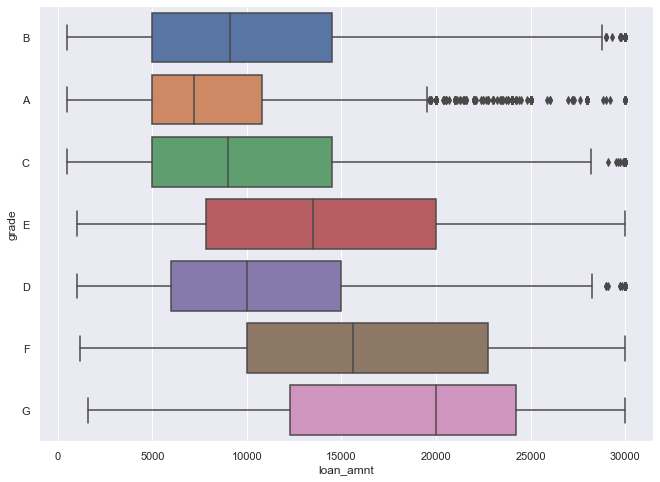

In [145]:
sns.boxplot(data=df, x='loan_amnt', y='grade')

Grade G has highest average of loan amount. A Grade borrower has the lowest.

<AxesSubplot:xlabel='int_rate_flt', ylabel='term'>

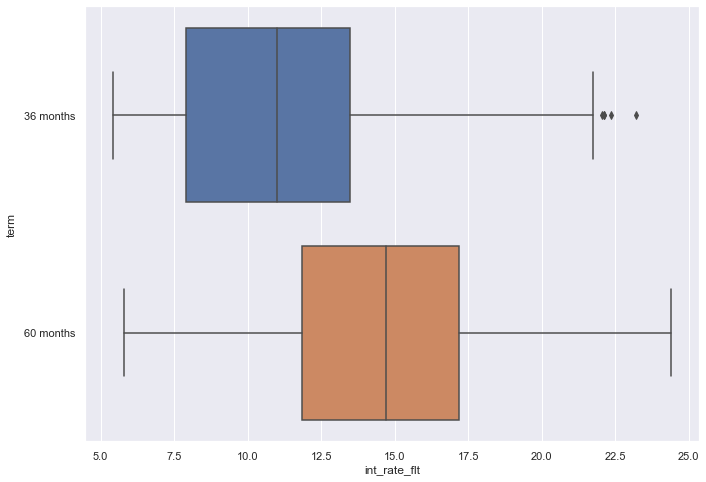

In [146]:
sns.boxplot(data=df, x='int_rate_flt', y='term')

average Interest rate is lower for 36 months tenure. Long tenure loans are having higer interest rates

<AxesSubplot:xlabel='int_rate_flt', ylabel='purpose'>

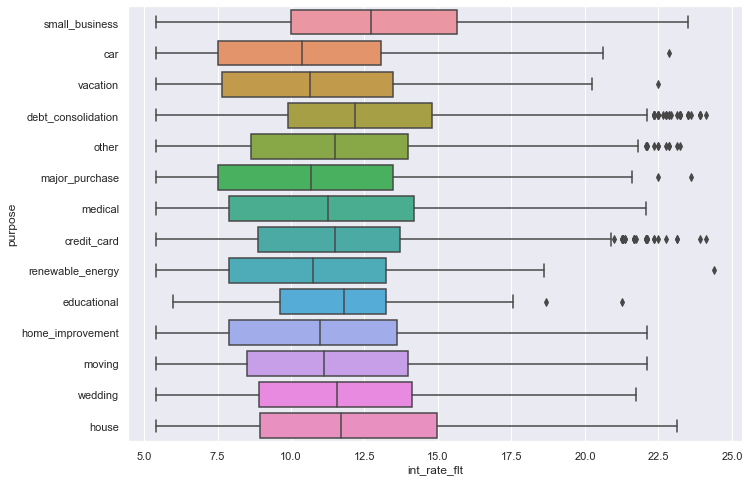

In [147]:
sns.boxplot(data=df, x='int_rate_flt', y='purpose')

loan taken for small business has higher interest rates. debt consolidation is the second. The loan amount we have seen previosly for credit_card is 3rd one but here if we see the  average interest rate of credit card loan is lower thatn wedding, house and education.

<AxesSubplot:xlabel='grade', ylabel='int_rate_flt'>

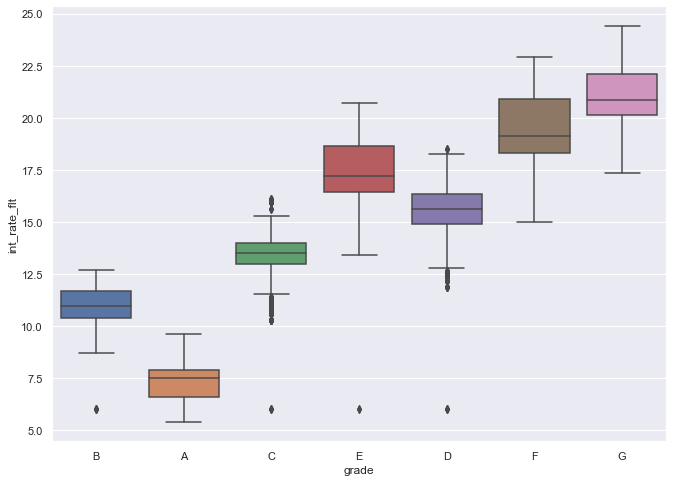

In [148]:
sns.boxplot(data=df, y='int_rate_flt', x='grade')

Grade G borrowers are paying hihgest interest rate as compared to others.

<AxesSubplot:xlabel='issue_year', ylabel='int_rate_flt'>

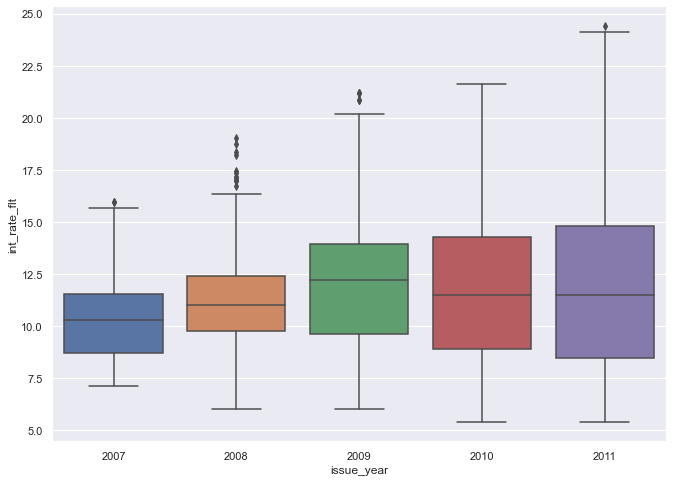

In [149]:
sns.boxplot(data=df, y='int_rate_flt', x='issue_year')

The average interest rate has been maximum in 2009 and after 2009 it has decreased.

<AxesSubplot:xlabel='dti_cat', ylabel='int_rate_flt'>

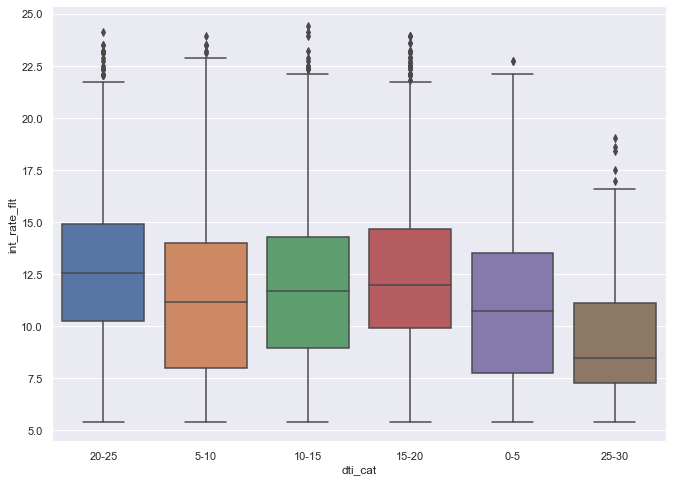

In [150]:
sns.boxplot(data=df, y='int_rate_flt', x='dti_cat')

The interest rate increases on loans as the debt to income ratio increases except in case of DTI ration 25-30.

<AxesSubplot:xlabel='int_rate_flt_cat', ylabel='annual_inc'>

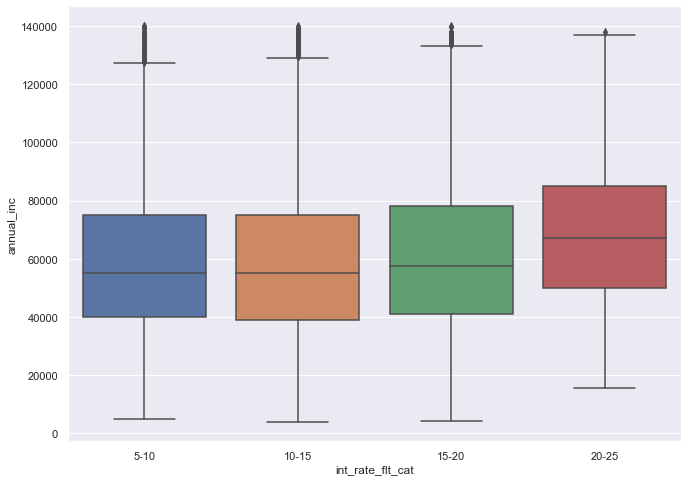

In [151]:
sns.boxplot(data=df, y='annual_inc', x='int_rate_flt_cat')

Higher interest rates on loan are paid by higher annual income borrowers